## Visualize the Results

In [1]:
## straight model
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/straight_model/learning_rate/0.0001/corrode_asym_rcs_50x4_best_val_test_dataset

## u-net-dsnt (need to be simplified)
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/u_net_dsnt/learning_rate/0.00005/corrode_asym_rcs_50x4_best_val_test_dataset

## scn-dsnt
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/learning_rate/0.0001/corrode_asym_rcs_50x4_best_val_test_dataset
# maybe not use it, because even remove one layer, the precision dropped deeply...

import numpy as np

base_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection"
# the models' dir
model_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/straight_model/learning_rate/0.0001/07Jun20241742"

corrode_asym_rcs_file = "corrode_asym_rcs_50x4_best_val_test_dataset.npy"

corrode_asym_rcs_error = np.load(f"{model_dir}/{corrode_asym_rcs_file}")

In [26]:
import matplotlib.pyplot as plt

# errs_d: error distance (corroded_layers_num)
def sym_rcs(errs_d):
    # identify
    min_value = np.min(errs_d)
    min_value_idx = np.argwhere(errs_d==min_value)
    print("min value: ", min_value)
    print("index    : ", min_value_idx)
    # plot
    corroded_ls = np.arange(0, 50)
    plt.plot(corroded_ls, errs_d, 'r--')
    plt.xlabel('Corroded Layers(row&column&slice corroded num)')
    plt.ylabel('Error Distance per Landmarks (mm)')
    plt.show()

In [30]:
import matplotlib.pyplot as plt

# err_array_15x15x15
def sym_rcs(errs_d):
    corroded_ls = np.arange(0, 15)
    
    corroded_column_num = 3
    corroded_slice_num = 13
    
    plt.plot(corroded_ls, errs_d[:, corroded_column_num, corroded_slice_num], 'r--')
    
    plt.xlabel(f'Corroded Layers(row num, column={corroded_column_num}, slice={corroded_slice_num})')
    plt.ylabel('Error Distance per Landmarks (mm)')
    plt.show()

In [71]:
# s = 0 # slice
def f(errs_d, r, c, s=0):
    return errs_d[r, c, s]

In [ ]:
error_dis = 
slice_num = 14

row = np.linspace(0, 13, 15).astype(int)
column = np.linspace(0, 14, 15).astype(int)

R, C = np.meshgrid(row, column)
E = f(error_dis, R, C, s=slice_num)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(R, C, E, linewidths=0.8)
ax.set_title(f"corroded slice num: {slice_num}")
plt.xlabel("Corroded Row num")
plt.ylabel("Corroded Column num")
plt.show()

In [73]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

row = np.linspace(0, 13, 15).astype(int)
column = np.linspace(0, 14, 15).astype(int)

R, C = np.meshgrid(row, column)
E1 = f(R, C, s=0)
E2 = f(R, C, s=14)

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

ax.plot_wireframe(R, C, E1)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(R, C, E2)

plt.show()

## Corrode 6 surfaces separately

In [122]:
## straight model
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/straight_model/learning_rate/0.0001/07Jun20241742/corrode_asym_rcs_50x4_best_val_test_dataset
# s1.5 noise
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1.5_test_dis/two_landmarks/straight_model/learning_rate/0.0001/20Jun2024-15:53:45-trainID-45

## u-net-dsnt (need to be simplified)
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/u_net_dsnt/learning_rate/0.00005/09Jun20242158/corrode_asym_rcs_50x4_best_val_test_dataset

## scn-dsnt
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/learning_rate/0.0001/07Jun20241709/corrode_asym_rcs_50x4_best_val_test_dataset
# maybe not use it, because even remove one layer, the precision dropped deeply...
# try one more...
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/kernel_size/local_5x5x5_spatial_15x15x15/13Jun2024-11:58:31-trainID-5
## less overfitting? but maybe underfitting
# epoch_6 /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/kernel_size/local_7x7x7_spatial_9x9x5/17Jun2024-13:44:55-trainID-8
# epoch_7 /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/kernel_size/local_7x7x7_spatial_9x9x5/17Jun2024-13:44:55-trainID-8

## cov-only
# /data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/cov_only_dsnt/learning_rate/0.0001/13Jun2024-11:59:29-trainID-10

import numpy as np

base_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection"
# base_dir = "/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection"
# the models' dir
straight_model_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/straight_model/learning_rate/0.0001/07Jun20241742"
straight_model_S1a5_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1.5_test_dis/two_landmarks/straight_model/learning_rate/0.0001/20Jun2024-15:53:45-trainID-45"
unet_model_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/u_net_dsnt/learning_rate/0.00005/09Jun20242158"
scn_model_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/learning_rate/0.0001/07Jun20241709"
scn_model_bigK_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/kernel_size/local_5x5x5_spatial_15x15x15/13Jun2024-11:58:31-trainID-5"
scn_less_overfit_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/scn_dsnt/kernel_size/local_7x7x7_spatial_9x9x5/17Jun2024-13:44:55-trainID-8/epoch_6"
cov_only_dir = f"{base_dir}/models/cropped/100x100x100/noises_s1_test_dis/two_landmarks/cov_only_dsnt/learning_rate/0.0001/13Jun2024-11:59:29-trainID-10"

corrode_asym_rcs_file = "corrode_asym_rcs_50x4_best_val_test_dataset.npy"

straight_model_corrode_asym_rcs_error = np.load(f"{straight_model_dir}/{corrode_asym_rcs_file}")
straight_model_S1a5_corrode_asym_rcs_error = np.load(f"{straight_model_S1a5_dir}/{corrode_asym_rcs_file}")
unet_corrode_asym_rcs_error = np.load(f"{unet_model_dir}/{corrode_asym_rcs_file}")

scn_corrode_asym_rcs_error = np.load(f"{scn_model_dir}/{corrode_asym_rcs_file}")
scn_bigK_corrode_asym_rcs_error = np.load(f"{scn_model_bigK_dir}/{corrode_asym_rcs_file}")
scn_less_overfit_asym_rcs_error = np.load(f"{scn_less_overfit_dir}/{corrode_asym_rcs_file}")

covonly_corrode_asym_rcs_error = np.load(f"{cov_only_dir}/{corrode_asym_rcs_file}")

In [18]:
print(scn_corrode_asym_rcs_error[:, :, 0])

[[  0.673   0.984  12.049 116.894  16.107   5.783   5.787   8.654  12.746
    6.794   7.195   9.984  14.375   8.831   9.889  12.821  18.551  11.494
   13.131  15.642  24.408  12.194  13.339  16.483  27.144  10.989  11.15
   16.183  28.352   9.013   9.304  16.045  22.878   7.418   7.707  13.555
   21.772   6.942   7.073   8.389  14.894   6.254   6.991   7.232  16.745
    6.633   7.28    7.387  17.91    7.441   7.882]
 [  0.673   1.571   5.056 411.731 144.168  11.517   3.002   4.037  19.119
   12.425   2.841   3.635  19.809  13.677   3.292   4.398  24.794  18.898
    4.062   6.728  37.151  29.719   6.567  11.776  55.205  41.57    8.823
   12.857  55.015  41.145   9.162  12.664  53.474  41.3     9.558  12.659
   54.066  42.592   9.653  12.55   53.951  42.755   9.534  12.332  50.699
   39.728   9.176  11.565  45.473  33.941   8.479]
 [  0.673   4.207  13.711  25.433   3.563   2.145   2.284   5.846   2.943
    2.204   2.382   6.335   4.023   2.943   2.89    5.55    4.892   5.956
    6.041  

In [84]:
from matplotlib import pyplot

def show_asym_rcs(errs_d, model_info, xrange=51, set_y=False):
    corroded_layers = np.arange(0, xrange)
    figure, axis = pyplot.subplots(3, 2, sharex=True, sharey=True, constrained_layout=True)
    
    # based on the Volume array
    # Cut from start to Row ascending order
    axis[0][0].plot(corroded_layers, errs_d[0], 'r--')
    axis[0][0].set_xlabel("row: ascending")
    # Cut from end to Row descending order
    axis[0][1].plot(corroded_layers, errs_d[1], 'r--')
    axis[0][1].set_xlabel("row: descending")
    figure.suptitle(f"{model_info}: Corrode outside layers, volume size (100x100x100), two landmark", fontsize=16)
    # Cut from start to Column ascending order
    axis[1][0].plot(corroded_layers, errs_d[2], 'r--')
    axis[1][0].set_xlabel("column: ascending")
    # Cut from end to Column descending order
    axis[1][1].plot(corroded_layers, errs_d[3], 'r--')
    axis[1][1].set_xlabel("column: descending")
    # Cut from start to Slice ascending order
    axis[2][0].plot(corroded_layers, errs_d[4], 'r--')
    axis[2][0].set_xlabel("slice: ascending")
    # Cut from end to Slice descending order
    axis[2][1].plot(corroded_layers, errs_d[5], 'r--')
    axis[2][1].set_xlabel("slice: descending")
    
    # pyplot.setp(axs[-1, :], xlabel='corrode num')
    pyplot.setp(axis[:, 0], ylabel='(mm)')
   
    if set_y:
        pyplot.ylim(0, 10)
    
    pyplot.show()


### Straight model
It can fit with our assumption, compare to convonly network, I think it's max pooling layers make the info loss smoothly decrease the precision.
### u_net
I think it's also fit with our assumption. 
### scn
I think the part we corrode out stil has some influence on the model, I mean not "void" include, or it is not just lost some info.
### cov_only
generally good, but we can see some peak in the begining. I think it's also maybe because of the info we "removed", actually still have some influence on the model.
___
I guess, to find the ROI automatically, the model need to have the ability to focus more on the more important area. emmm that not make much sense... is it also can caused by not training well? you know like the model is easily influenced by meaningless part. think... <br>
Is it possible, because of overfitting? think... that's should be interesting haha

In [82]:
# slope
straight_corrode_slop = np.zeros((6, 50))
for rcs in range(6):
    for c in range(50):
        straight_corrode_slop[rcs][c] = straight_model_corrode_asym_rcs_error[rcs][c+1][0] - straight_model_corrode_asym_rcs_error[rcs][c][0]
    

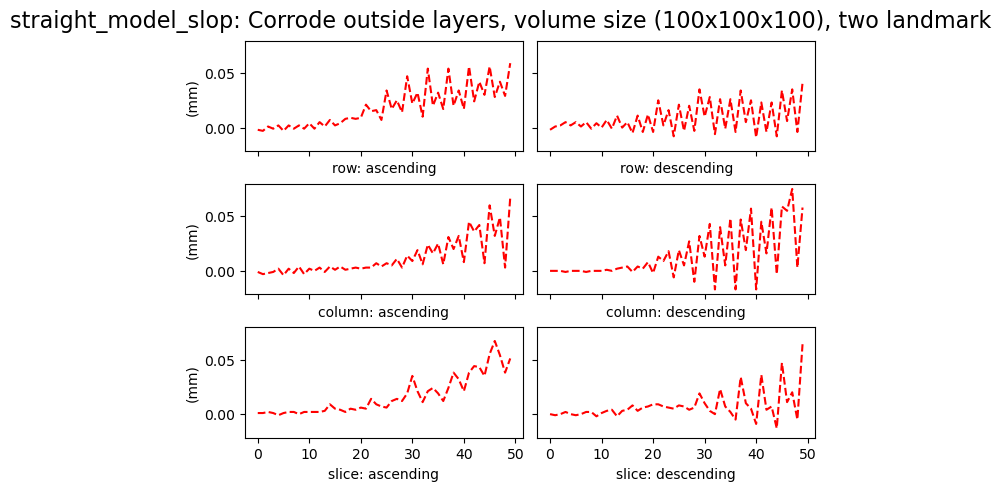

In [86]:
show_asym_rcs(straight_corrode_slop, "straight_model_slop", xrange=50)

In [87]:
print(straight_model_corrode_asym_rcs_error[:, :, 0])

[[0.306 0.304 0.301 0.302 0.301 0.303 0.3   0.302 0.301 0.303 0.302 0.306
  0.305 0.31  0.311 0.318 0.32  0.324 0.332 0.341 0.349 0.358 0.379 0.394
  0.41  0.417 0.451 0.468 0.493 0.507 0.554 0.576 0.608 0.618 0.672 0.692
  0.724 0.741 0.795 0.815 0.849 0.866 0.922 0.946 0.988 1.018 1.074 1.102
  1.144 1.173 1.232]
 [0.306 0.304 0.305 0.307 0.312 0.314 0.319 0.32  0.325 0.324 0.328 0.328
  0.335 0.334 0.345 0.345 0.35  0.345 0.356 0.352 0.364 0.36  0.385 0.387
  0.403 0.395 0.416 0.413 0.433 0.43  0.465 0.475 0.503 0.497 0.523 0.522
  0.548 0.544 0.578 0.583 0.608 0.599 0.622 0.618 0.641 0.633 0.667 0.673
  0.708 0.704 0.745]
 [0.306 0.305 0.302 0.3   0.299 0.301 0.297 0.299 0.297 0.301 0.298 0.3
  0.3   0.303 0.302 0.306 0.307 0.311 0.312 0.314 0.317 0.319 0.322 0.325
  0.332 0.336 0.343 0.348 0.359 0.362 0.376 0.385 0.404 0.41  0.434 0.45
  0.475 0.481 0.512 0.532 0.564 0.572 0.617 0.653 0.695 0.702 0.762 0.794
  0.843 0.846 0.913]
 [0.306 0.306 0.306 0.306 0.305 0.305 0.305 0.305 0.

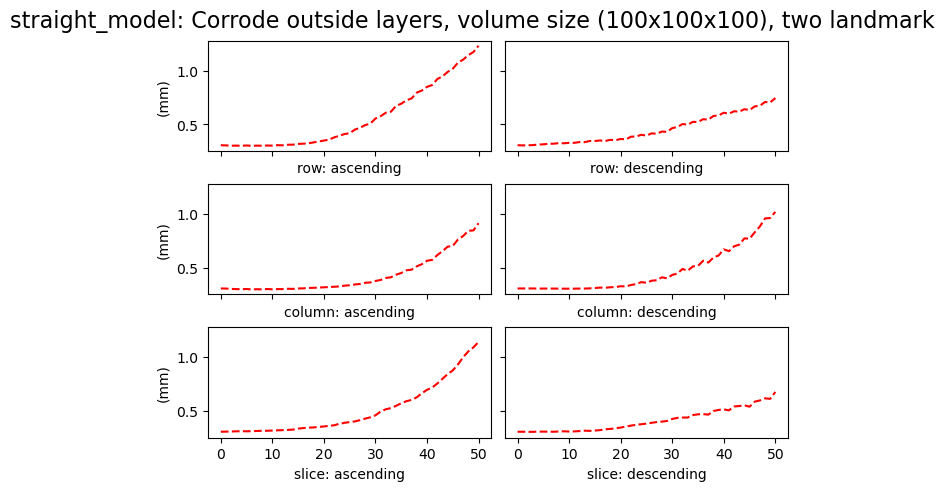

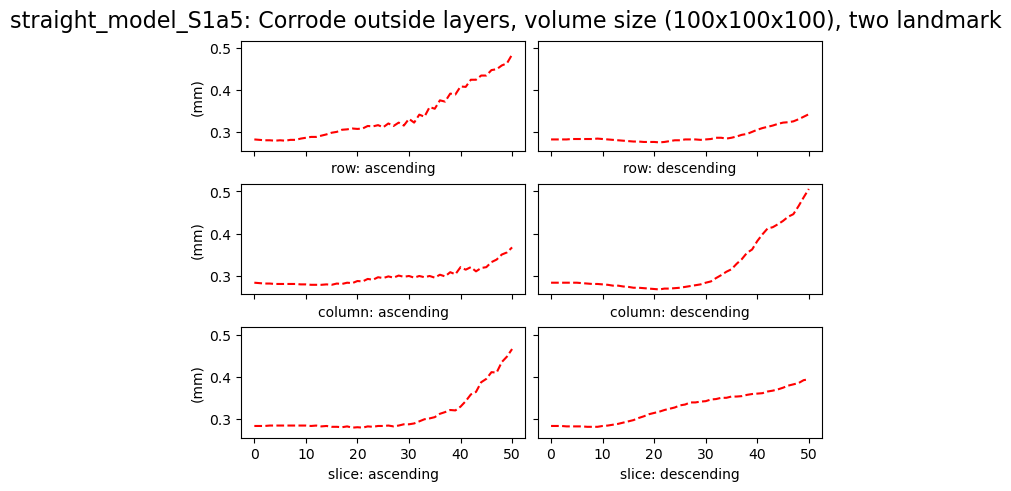

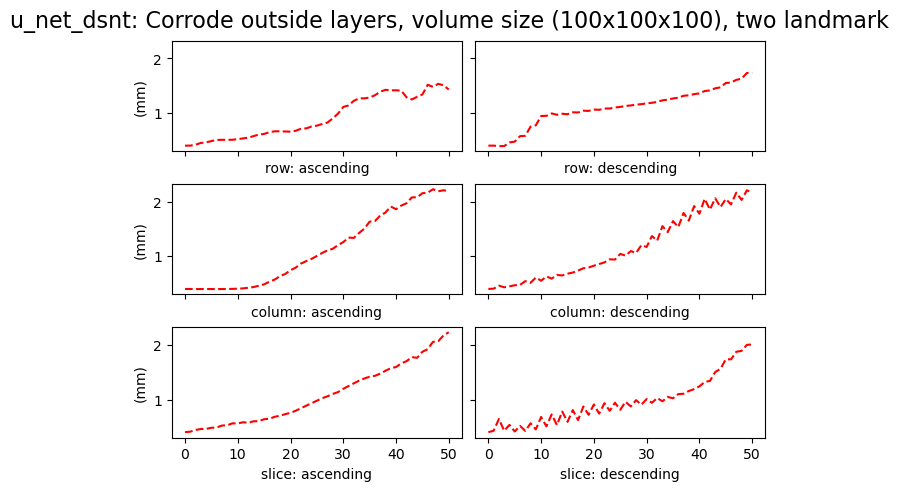

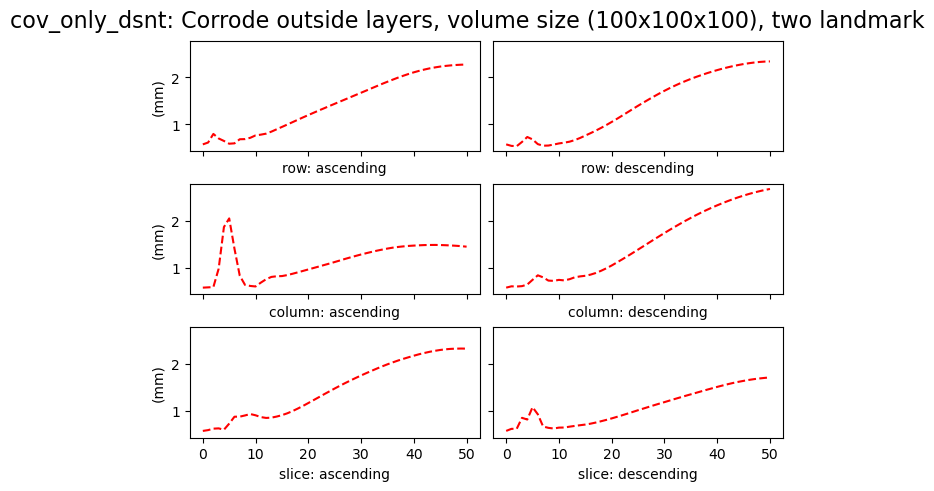

In [123]:
show_asym_rcs(straight_model_corrode_asym_rcs_error[:, :, 0], "straight_model")
show_asym_rcs(straight_model_S1a5_corrode_asym_rcs_error[:, :, 0], "straight_model_S1a5")
show_asym_rcs(unet_corrode_asym_rcs_error[:, :, 0], "u_net_dsnt")
show_asym_rcs(covonly_corrode_asym_rcs_error[:, :, 0], "cov_only_dsnt")

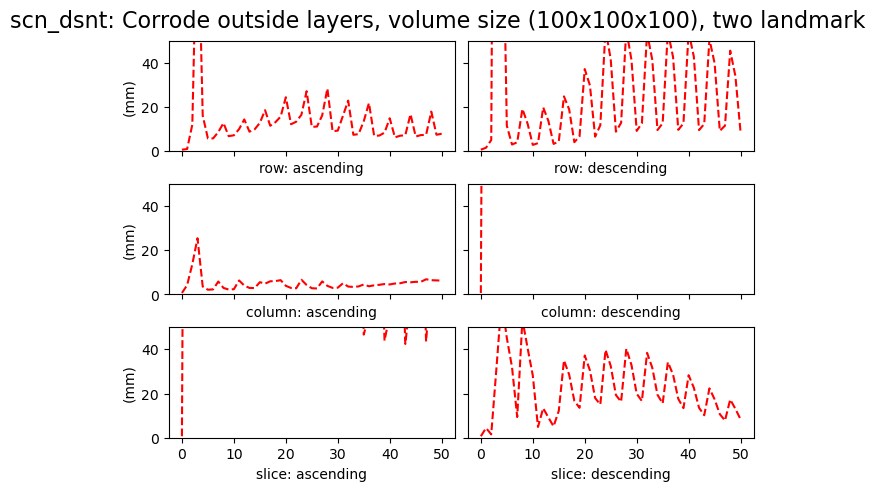

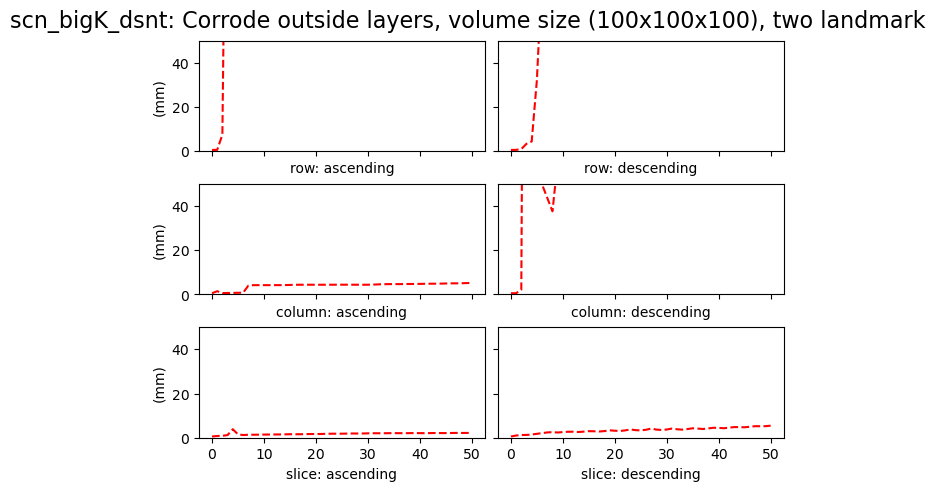

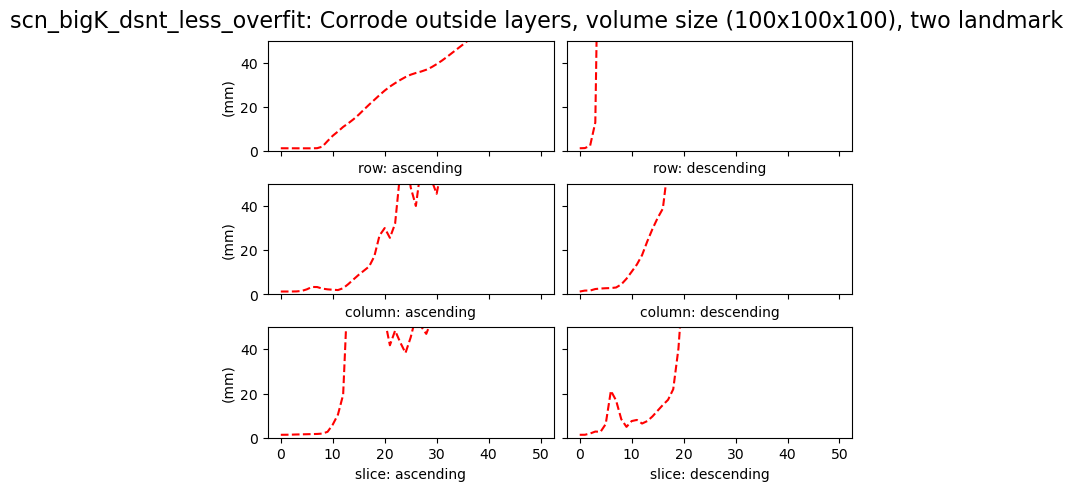

In [78]:
show_asym_rcs(scn_corrode_asym_rcs_error[:, :, 0], "scn_dsnt", set_y=True)
show_asym_rcs(scn_bigK_corrode_asym_rcs_error[:, :, 0], "scn_bigK_dsnt", set_y=True)
show_asym_rcs(scn_less_overfit_asym_rcs_error[:, :, 0], "scn_bigK_dsnt_less_overfit", set_y=True)

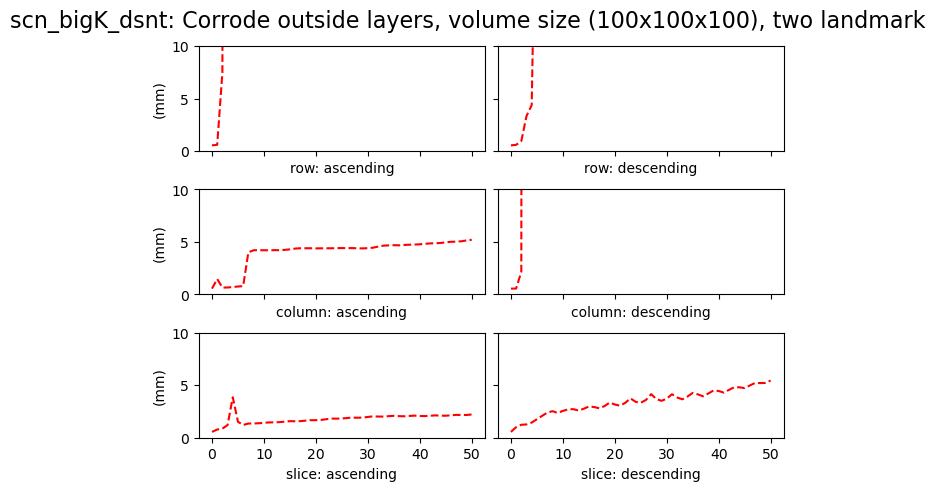

In [80]:
show_asym_rcs(scn_bigK_corrode_asym_rcs_error[:, :, 0], "scn_bigK_dsnt", set_y=True)

In [99]:
# try to find the maximum cut layers' num
# like 10% of the whole slope, from the start point to the half cutting num

def find_cut_size(errs_d, compromise_rate, model_info):
    # row ascending, row des, column_a, column_d, slice_a, slice_d
    cut_layers_all = []
    for i in range(3):
        cut_layers_a = []
        cut_layers_d = []
        ascending_slope_base = (errs_d[2*i, 50] - errs_d[2*i, 0]) / 51
        descending_slope_base = (errs_d[2*i+1, 50] - errs_d[2*i+1, 0]) / 51
        for cut in range(1, 50):
            slop = (errs_d[2 * i, cut] - errs_d[2 * i, 0]) / cut
            if slop > ascending_slope_base * compromise_rate:
                cut_layers_a.append(cut)
        for cut in range(1, 50):
            slop = (errs_d[2 * i + 1, cut] - errs_d[2 * i + 1, 0]) / cut
            if slop > descending_slope_base * compromise_rate:
                cut_layers_d.append(cut)
        cut_layers_all.append(cut_layers_a)
        cut_layers_all.append(cut_layers_d)

    print(f"*** {model_info} ***")
    print("row_a_cut_num: ", cut_layers_all[0])
    print("row_d_cut_num: ", cut_layers_all[1])
    print("column_a_cut_num: ", cut_layers_all[2])
    print("column_d_cut_num: ", cut_layers_all[3])
    print("slice_a_cut_num: ", cut_layers_all[4])
    print("slice_d_cut_num: ", cut_layers_all[5])


# error increase, 10%, 20%, 30%, 40%, 50%
def find_cut_base_error(errs_d, compromise_rate, model_info):
    print(f"*** {model_info} ***")
    for cr in compromise_rate:
        cut_layer_all = []
        for i in range(3):
            cut_layer_a = 0
            cut_layer_d = 0
            for cut in range(1, 50):
                if errs_d[2 * i, cut] > errs_d[2 * i , 0] * (1+cr):
                    cut_layer_a = cut - 1
                    break
            for cut in range(1, 50):
                if errs_d[2 * i + 1, cut] > errs_d[2 * i + 1 , 0] * (1+cr):
                    cut_layer_d = cut - 1
                    break
            cut_layer_all.append([cut_layer_a, cut_layer_d])
        input_shape = (100-cut_layer_all[0][0]-cut_layer_all[0][1], 
                       100-cut_layer_all[1][0]-cut_layer_all[1][1], 
                       100-cut_layer_all[2][0]-cut_layer_all[2][1])
        print(f"compromise rate [{cr}], row column slice: {cut_layer_all}, input shape: {input_shape}")
        

In [127]:
find_cut_base_error(straight_model_S1a5_corrode_asym_rcs_error[:, :, 0], [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], "straight model S1a5")

# *** straight model S1a5 ***
# compromise rate [0.01], row column slice: [[9, 31], [19, 30], [28, 11]], input shape: (60, 51, 61) **
# compromise rate [0.02], row column slice: [[10, 35], [21, 31], [30, 13]], input shape: (55, 48, 57)
# compromise rate [0.03], row column slice: [[12, 36], [21, 31], [31, 14]], input shape: (52, 48, 55)
# compromise rate [0.04], row column slice: [[13, 37], [23, 32], [32, 15]], input shape: (50, 45, 53) **
# compromise rate [0.05], row column slice: [[14, 38], [25, 32], [32, 16]], input shape: (48, 43, 52)
# compromise rate [0.06], row column slice: [[15, 38], [27, 32], [33, 16]], input shape: (47, 41, 51)
# compromise rate [0.07], row column slice: [[16, 39], [37, 33], [34, 17]], input shape: (45, 30, 49)
# compromise rate [0.08], row column slice: [[16, 39], [37, 33], [35, 17]], input shape: (45, 30, 48)
# compromise rate [0.09], row column slice: [[18, 40], [39, 33], [35, 18]], input shape: (42, 28, 47)

*** straight model S1a5 ***
compromise rate [0.01], row column slice: [[9, 31], [19, 30], [28, 11]], input shape: (60, 51, 61)
compromise rate [0.02], row column slice: [[10, 35], [21, 31], [30, 13]], input shape: (55, 48, 57)
compromise rate [0.03], row column slice: [[12, 36], [21, 31], [31, 14]], input shape: (52, 48, 55)
compromise rate [0.04], row column slice: [[13, 37], [23, 32], [32, 15]], input shape: (50, 45, 53)
compromise rate [0.05], row column slice: [[14, 38], [25, 32], [32, 16]], input shape: (48, 43, 52)
compromise rate [0.06], row column slice: [[15, 38], [27, 32], [33, 16]], input shape: (47, 41, 51)
compromise rate [0.07], row column slice: [[16, 39], [37, 33], [34, 17]], input shape: (45, 30, 49)
compromise rate [0.08], row column slice: [[16, 39], [37, 33], [35, 17]], input shape: (45, 30, 48)
compromise rate [0.09], row column slice: [[18, 40], [39, 33], [35, 18]], input shape: (42, 28, 47)


In [ ]:
# # Straight model S1.5 100x100x100
# {'mean_dis_all': 0.283, 'std_dev_all': 0.147, 'mean_dis_1': 0.16, 'std_dev_1': 0.079, 'mean_dis_2': 0.406, 'std_dev_2': 0.08}
# # compromise rate [0.01], row column slice: [[9, 31], [19, 30], [28, 11]], input shape: (60, 51, 61)
# {'mean_dis_all': 0.235, 'std_dev_all': 0.089, 'mean_dis_1': 0.19, 'std_dev_1': 0.076, 'mean_dis_2': 0.28, 'std_dev_2': 0.079}
# # compromise rate [0.02], row column slice: [[10, 35], [21, 31], [30, 13]], input shape: (55, 48, 57)
# {'mean_dis_all': 0.247, 'std_dev_all': 0.122, 'mean_dis_1': 0.179, 'std_dev_1': 0.077, 'mean_dis_2': 0.316, 'std_dev_2': 0.121}
# # compromise rate [0.03], row column slice: [[12, 36], [21, 31], [31, 14]], input shape: (52, 48, 55)
# {'mean_dis_all': 0.26, 'std_dev_all': 0.096, 'mean_dis_1': 0.214, 'std_dev_1': 0.086, 'mean_dis_2': 0.305, 'std_dev_2': 0.082}
# # compromise rate [0.04], row column slice: [[13, 37], [23, 32], [32, 15]], input shape: (50, 45, 53)
# {'mean_dis_all': 0.236, 'std_dev_all': 0.094, 'mean_dis_1': 0.184, 'std_dev_1': 0.075, 'mean_dis_2': 0.288, 'std_dev_2': 0.081}
# # compromise rate [0.05], row column slice: [[14, 38], [25, 32], [32, 16]], input shape: (48, 43, 52)
# {'mean_dis_all': 0.244, 'std_dev_all': 0.11, 'mean_dis_1': 0.2, 'std_dev_1': 0.107, 'mean_dis_2': 0.287, 'std_dev_2': 0.096}
# # compromise rate [0.06], row column slice: [[15, 38], [27, 32], [33, 16]], input shape: (47, 41, 51)
# {'mean_dis_all': 0.282, 'std_dev_all': 0.154, 'mean_dis_1': 0.226, 'std_dev_1': 0.102, 'mean_dis_2': 0.338, 'std_dev_2': 0.175}
# # compromise rate [0.07], row column slice: [[16, 39], [37, 33], [34, 17]], input shape: (45, 30, 49)
# {'mean_dis_all': 0.315, 'std_dev_all': 0.106, 'mean_dis_1': 0.294, 'std_dev_1': 0.107, 'mean_dis_2': 0.335, 'std_dev_2': 0.101}
# # compromise rate [0.08], row column slice: [[16, 39], [37, 33], [35, 17]], input shape: (45, 30, 48)
# {'mean_dis_all': 0.29, 'std_dev_all': 0.113, 'mean_dis_1': 0.264, 'std_dev_1': 0.124, 'mean_dis_2': 0.315, 'std_dev_2': 0.095}
# # compromise rate [0.09], row column slice: [[18, 40], [39, 33], [35, 18]], input shape: (42, 28, 47)
# {'mean_dis_all': 0.339, 'std_dev_all': 0.116, 'mean_dis_1': 0.336, 'std_dev_1': 0.116, 'mean_dis_2': 0.341, 'std_dev_2': 0.116}

In [128]:
s1_errs_s1corrode = [0.306, 0.248, 0.238, 0.247, 0.238, 0.24, 0.243, 0.265, 0.284, 0.34]
s1a5_errs_s1a5corrode = [0.283, 0.235, 0.247, 0.26, 0.236, 0.244, 0.282, 0.315, 0.29, 0.339]

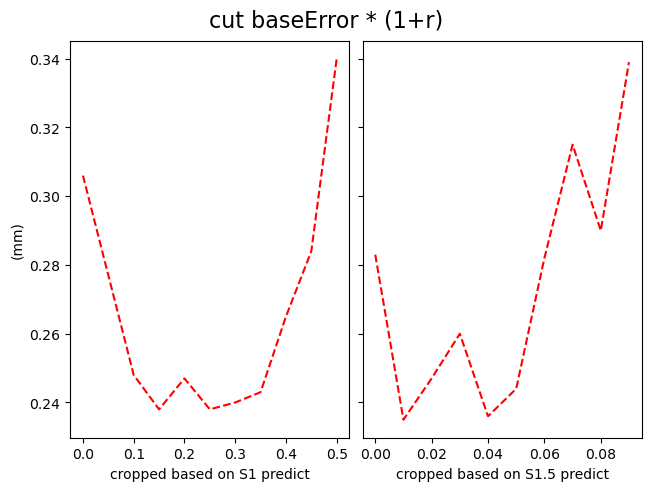

In [132]:
from matplotlib import pyplot

corroded_layers_1 = [0., 0.1,  0.15, 0.2,  0.25, 0.3,  0.35, 0.4,  0.45, 0.5 ]
corroded_layers_2 = [0., 0.01,  0.02, 0.03,  0.04, 0.05,  0.06, 0.07,  0.08, 0.09 ]
figure, axis = pyplot.subplots(1, 2, sharex=False, sharey=True, constrained_layout=True)

figure.suptitle("cut baseError * (1+r)", fontsize=16)
axis[0].plot(corroded_layers_1, s1_errs_s1corrode, 'r--')
axis[0].set_xlabel("cropped based on S1 predict")
# Cut from end to Row descending order
axis[1].plot(corroded_layers_2, s1a5_errs_s1a5corrode, 'r--')
axis[1].set_xlabel("cropped based on S1.5 predict")

# pyplot.setp(axs[-1, :], xlabel='corrode num')
pyplot.setp(axis[0], ylabel='(mm)')

pyplot.show()

In [100]:
find_cut_base_error(straight_model_corrode_asym_rcs_error[:, :, 0], [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], "straight model")

*** straight model ***
compromise rate [0.1], row column slice: [[18, 13], [25, 21], [15, 18]], input shape: (69, 54, 67)
compromise rate [0.15], row column slice: [[20, 17], [27, 23], [19, 20]], input shape: (63, 50, 61)
compromise rate [0.2], row column slice: [[21, 21], [29, 25], [22, 22]], input shape: (58, 46, 56)
compromise rate [0.25], row column slice: [[22, 21], [30, 26], [23, 25]], input shape: (57, 44, 52)
compromise rate [0.3], row column slice: [[23, 23], [31, 27], [25, 27]], input shape: (54, 42, 48)
compromise rate [0.35], row column slice: [[24, 25], [33, 29], [26, 29]], input shape: (51, 38, 45)
compromise rate [0.4], row column slice: [[25, 27], [33, 29], [28, 30]], input shape: (48, 38, 42)
compromise rate [0.45], row column slice: [[25, 29], [34, 30], [29, 33]], input shape: (46, 36, 38)
compromise rate [0.5], row column slice: [[26, 29], [35, 31], [29, 33]], input shape: (45, 34, 38)


In [121]:
# *** straight model ***
# compromise rate [0.1], row column slice: [[18, 13], [25, 21], [15, 18]], input shape: (69, 54, 67)
# compromise rate [0.15], row column slice: [[20, 17], [27, 23], [19, 20]], input shape: (63, 50, 61) **
# compromise rate [0.2], row column slice: [[21, 21], [29, 25], [22, 22]], input shape: (58, 46, 56)
# compromise rate [0.25], row column slice: [[22, 21], [30, 26], [23, 25]], input shape: (57, 44, 52)
# compromise rate [0.3], row column slice: [[23, 23], [31, 27], [25, 27]], input shape: (54, 42, 48)
# compromise rate [0.35], row column slice: [[24, 25], [33, 29], [26, 29]], input shape: (51, 38, 45)
# compromise rate [0.4], row column slice: [[25, 27], [33, 29], [28, 30]], input shape: (48, 38, 42) **
# compromise rate [0.45], row column slice: [[25, 29], [34, 30], [29, 33]], input shape: (46, 36, 38)
# compromise rate [0.5], row column slice: [[26, 29], [35, 31], [29, 33]], input shape: (45, 34, 38)

# training results experiments after cutting
noise_s1_cut_exp = []
noise_s1a5_cut_exp = []
## 0.1 (69, 54, 67)
s1_res_dict = {'mean_dis_all': 0.248, 'std_dev_all': 0.127, 'mean_dis_1': 0.185, 'std_dev_1': 0.096, 'mean_dis_2': 0.312, 'std_dev_2': 0.123}
s1a5_res_dict = {'mean_dis_all': 0.249, 'std_dev_all': 0.098, 'mean_dis_1': 0.192, 'std_dev_1': 0.09, 'mean_dis_2': 0.306, 'std_dev_2': 0.068}
# compromise rate [0.1], row column slice: [[18, 13], [25, 21], [15, 18]], input shape: (69, 54, 67)
s1_res_dict.update({"compromise_rate": 0.1, "cuts_layer": [[18, 13], [25, 21], [15, 18]], "input_shape": (69, 54, 67)})
s1a5_res_dict.update({"compromise_rate": 0.1, "cuts_layer": [[18, 13], [25, 21], [15, 18]], "input_shape": (69, 54, 67)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.15 (63, 50, 61)
s1_res_dict = {'mean_dis_all': 0.238, 'std_dev_all': 0.124, 'mean_dis_1': 0.182, 'std_dev_1': 0.103, 'mean_dis_2': 0.294, 'std_dev_2': 0.118}
s1a5_res_dict = {'mean_dis_all': 0.241, 'std_dev_all': 0.101, 'mean_dis_1': 0.189, 'std_dev_1': 0.1, 'mean_dis_2': 0.293, 'std_dev_2': 0.073}
# compromise rate [0.15], row column slice: [[20, 17], [27, 23], [19, 20]], input shape: (63, 50, 61)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[20, 17], [27, 23], [19, 20]], "input_shape": (63, 50, 61)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[20, 17], [27, 23], [19, 20]], "input_shape": (63, 50, 61)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.2 (58, 46, 56)
s1_res_dict = {'mean_dis_all': 0.247, 'std_dev_all': 0.138, 'mean_dis_1': 0.206, 'std_dev_1': 0.127, 'mean_dis_2': 0.288, 'std_dev_2': 0.136}
s1a5_res_dict = {'mean_dis_all': 0.22, 'std_dev_all': 0.096, 'mean_dis_1': 0.188, 'std_dev_1': 0.089, 'mean_dis_2': 0.252, 'std_dev_2': 0.093}
# compromise rate [0.2], row column slice: [[21, 21], [29, 25], [22, 22]], input shape: (58, 46, 56)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[21, 21], [29, 25], [22, 22]], "input_shape": (58, 46, 56)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[21, 21], [29, 25], [22, 22]], "input_shape": (58, 46, 56)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.25 (57, 44, 52)
s1_res_dict = {'mean_dis_all': 0.238, 'std_dev_all': 0.125, 'mean_dis_1': 0.213, 'std_dev_1': 0.12, 'mean_dis_2': 0.263, 'std_dev_2': 0.124}
s1a5_res_dict = {'mean_dis_all': 0.219, 'std_dev_all': 0.097, 'mean_dis_1': 0.187, 'std_dev_1': 0.104, 'mean_dis_2': 0.251, 'std_dev_2': 0.077}
# compromise rate [0.25], row column slice: [[22, 21], [30, 26], [23, 25]], input shape: (57, 44, 52)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[22, 21], [30, 26], [23, 25]], "input_shape": (57, 44, 52)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[22, 21], [30, 26], [23, 25]], "input_shape": (57, 44, 52)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.3 (54, 42, 48)
s1_res_dict = {'mean_dis_all': 0.24, 'std_dev_all': 0.141, 'mean_dis_1': 0.209, 'std_dev_1': 0.142, 'mean_dis_2': 0.271, 'std_dev_2': 0.133}
s1a5_res_dict = {'mean_dis_all': 0.215, 'std_dev_all': 0.094, 'mean_dis_1': 0.178, 'std_dev_1': 0.081, 'mean_dis_2': 0.253, 'std_dev_2': 0.091}
# compromise rate [0.3], row column slice: [[23, 23], [31, 27], [25, 27]], input shape: (54, 42, 48)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[23, 23], [31, 27], [25, 27]], "input_shape": (54, 42, 48)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[23, 23], [31, 27], [25, 27]], "input_shape": (54, 42, 48)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.35 (51, 38, 45)
s1_res_dict = {'mean_dis_all': 0.243, 'std_dev_all': 0.127, 'mean_dis_1': 0.221, 'std_dev_1': 0.137, 'mean_dis_2': 0.265, 'std_dev_2': 0.111}
s1a5_res_dict = {'mean_dis_all': 0.208, 'std_dev_all': 0.093, 'mean_dis_1': 0.187, 'std_dev_1': 0.109, 'mean_dis_2': 0.229, 'std_dev_2': 0.068}
# compromise rate [0.35], row column slice: [[24, 25], [33, 29], [26, 29]], input shape: (51, 38, 45)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[24, 25], [33, 29], [26, 29]], "input_shape": (51, 38, 45)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[24, 25], [33, 29], [26, 29]], "input_shape": (51, 38, 45)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.4 (48, 38, 42)
s1_res_dict = {'mean_dis_all': 0.265, 'std_dev_all': 0.151, 'mean_dis_1': 0.219, 'std_dev_1': 0.134, 'mean_dis_2': 0.312, 'std_dev_2': 0.153}
s1a5_res_dict = {'mean_dis_all': 0.196, 'std_dev_all': 0.09, 'mean_dis_1': 0.181, 'std_dev_1': 0.1, 'mean_dis_2': 0.21, 'std_dev_2': 0.075}
# compromise rate [0.4], row column slice: [[25, 27], [33, 29], [28, 30]], input shape: (48, 38, 42)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[25, 27], [33, 29], [28, 30]], "input_shape": (48, 38, 42)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[25, 27], [33, 29], [28, 30]], "input_shape": (48, 38, 42)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.45 (46, 36, 38)
s1_res_dict = {'mean_dis_all': 0.284, 'std_dev_all': 0.143, 'mean_dis_1': 0.295, 'std_dev_1': 0.149, 'mean_dis_2': 0.273, 'std_dev_2': 0.135}
s1a5_res_dict = {'mean_dis_all': 0.226, 'std_dev_all': 0.091, 'mean_dis_1': 0.238, 'std_dev_1': 0.103, 'mean_dis_2': 0.214, 'std_dev_2': 0.075}
# compromise rate [0.45], row column slice: [[25, 29], [34, 30], [29, 33]], input shape: (46, 36, 38)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[25, 29], [34, 30], [29, 33]], "input_shape": (46, 36, 38)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[25, 29], [34, 30], [29, 33]], "input_shape": (46, 36, 38)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())
## 0.5 (45, 34, 38)
s1_res_dict = {'mean_dis_all': 0.34, 'std_dev_all': 0.189, 'mean_dis_1': 0.348, 'std_dev_1': 0.181, 'mean_dis_2': 0.331, 'std_dev_2': 0.195}
s1a5_res_dict = {'mean_dis_all': 0.232, 'std_dev_all': 0.088, 'mean_dis_1': 0.225, 'std_dev_1': 0.101, 'mean_dis_2': 0.24, 'std_dev_2': 0.071}
# compromise rate [0.5], row column slice: [[26, 29], [35, 31], [29, 33]], input shape: (45, 34, 38)
s1_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[26, 29], [35, 31], [29, 33]], "input_shape": (45, 34, 38)})
s1a5_res_dict.update({"compromise_rate": 0.15, "cuts_layer": [[26, 29], [35, 31], [29, 33]], "input_shape": (45, 34, 38)})
noise_s1_cut_exp.append(s1_res_dict.copy())
noise_s1a5_cut_exp.append(s1a5_res_dict.copy())

In [112]:
s1_errs = [0.306, 0.248, 0.238, 0.247, 0.238, 0.24, 0.243, 0.265, 0.284, 0.34]
s1a5_errs = [0.306, 0.249, 0.241, 0.22, 0.219, 0.215, 0.208, 0.196, 0.226, 0.232]

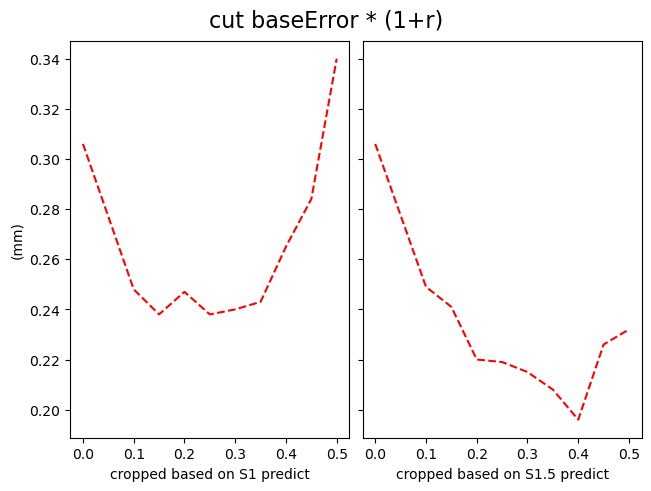

In [119]:
from matplotlib import pyplot

corroded_layers = [0., 0.1,  0.15, 0.2,  0.25, 0.3,  0.35, 0.4,  0.45, 0.5 ]
figure, axis = pyplot.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)

figure.suptitle("cut baseError * (1+r)", fontsize=16)
axis[0].plot(corroded_layers, s1_errs, 'r--')
axis[0].set_xlabel("cropped based on S1 predict")
# Cut from end to Row descending order
axis[1].plot(corroded_layers, s1a5_errs, 'r--')
axis[1].set_xlabel("cropped based on S1.5 predict")

# pyplot.setp(axs[-1, :], xlabel='corrode num')
pyplot.setp(axis[0], ylabel='(mm)')

pyplot.show()

In [97]:
find_cut_base_error(straight_model_corrode_asym_rcs_error[:, :, 0], [0.6, 0.7, 0.8, 0.9, 1], "straight model")

*** straight model ***
compromise rate [0.6], row column slice: [[27, 31], [37, 33], [30, 37]]
compromise rate [0.7], row column slice: [[29, 33], [38, 35], [32, 41]]
compromise rate [0.8], row column slice: [[29, 37], [39, 35], [34, 43]]
compromise rate [0.9], row column slice: [[31, 38], [41, 37], [35, 45]]
compromise rate [1], row column slice: [[32, 41], [41, 38], [37, 47]]


In [23]:
find_cut_size(straight_model_corrode_asym_rcs_error[:, :, 0], 0.1, "straight model")
find_cut_size(unet_corrode_asym_rcs_error[:, :, 0], 0.7, "u_net_dsnt model")
find_cut_size(covonly_corrode_asym_rcs_error[:, :, 0], 0.7, "cov_only_dsnt model")

*** straight model ***
row_a_cut_num:  [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
row_d_cut_num:  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
column_a_cut_num:  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
column_d_cut_num:  [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
slice_a_cut_num:  [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
slice_d_cut_num:  [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
*** u_net_dsnt model ***
row_a_cut_num:  [3, 4, 5, 6, 7, 14, 15, 16

## Cut and see the volume

In [2]:
import sys

sys.path.append("/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/src/models")
sys.path

['/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/notebook',
 '/home/wezw/.conda/envs/env_tensorflow/lib/python39.zip',
 '/home/wezw/.conda/envs/env_tensorflow/lib/python3.9',
 '/home/wezw/.conda/envs/env_tensorflow/lib/python3.9/lib-dynload',
 '',
 '/home/wezw/.conda/envs/env_tensorflow/lib/python3.9/site-packages',
 '/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/src/models']

In [3]:
# load dataset and crop
import TrainingSupport

2024-06-14 16:38:15.415919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def get_train_id(train_id, args_dict_list):
    for args_dict in args_dict_list:
        if args_dict["train_id"] == train_id:
            return args_dict

In [18]:
import start_training

args = start_training.base_args

args_list = start_training.train_straight_model()
args.update(get_train_id(7, args_list))
# args.update({"cut_layers": [[32, 28], [40, 36], [38, 30]]})
args.update({"cut_layers": [[19, 4], [25, 22], [15, 13]]})
# try s1.5 noise cropped dataset
# args.update({"dataset_label_1": "noises_s1.5_test_dis"})

In [19]:
print(args)

{'dataset_tag': 'cropped', 'input_shape': (100, 100, 100), 'cut_layers': [[19, 4], [25, 22], [15, 13]], 'base_dir': '/data/gpfs/projects/punim1836/Data', 'dataset_label_1': 'noises_s1_test_dis', 'data_split_tag': 'general', 'data_split_static': True, 'write_log': True, 'batch_size': 2, 'epochs': 100, 'loss_name': 'MSE_res', 'optimizer': 'Adam', 'learning_rate': 0.0001, 'decay_steps': 10000, 'decay_rate': 0.96, 'model_name': 'straight_model', 'model_output_num': 2, 'save_base_dir': '/data/gpfs/projects/punim1836/CT-MRI_LandmarkDetection/models', 'y_tag': 'two_landmarks', 'model_label_1': 'learning_rate', 'model_label_2': '0.0001', 'save_model': True, 'train_id': 7}


In [20]:
train_dataset, val_dataset, test_dataset = TrainingSupport.load_dataset_manager(args)

Read dataset from:  /data/gpfs/projects/punim1836/Data/cropped/100x100x100/noises_s1_test_dis/
Using static dataset split: Train, Val, Test


In [21]:
print(train_dataset[0].shape)

(1400, 77, 53, 72, 1)


In [22]:
print(train_dataset[1])

[[[23.5      13.       37.      ]
  [13.       35.       20.      ]]

 [[23.5      12.       37.      ]
  [17.5      37.5      18.      ]]

 [[27.94759  15.687597 37.884357]
  [13.18059  36.50527  22.65904 ]]

 ...

 [[37.88425  18.914335 39.841553]
  [28.048231 41.007477 22.866693]]

 [[34.218452 18.022799 32.551228]
  [14.917059 37.257587 24.126322]]

 [[35.78017  17.309988 42.581596]
  [29.355341 41.409626 26.740854]]]


In [23]:
check_id = 500

left_volume_check = train_dataset[0][check_id,:,:,:,0]
left_landmarks_check = train_dataset[1][check_id, :, :]
right_volume_check = train_dataset[0][check_id+1,:,:,:,0]
right_landmarks_check = train_dataset[1][check_id+1]

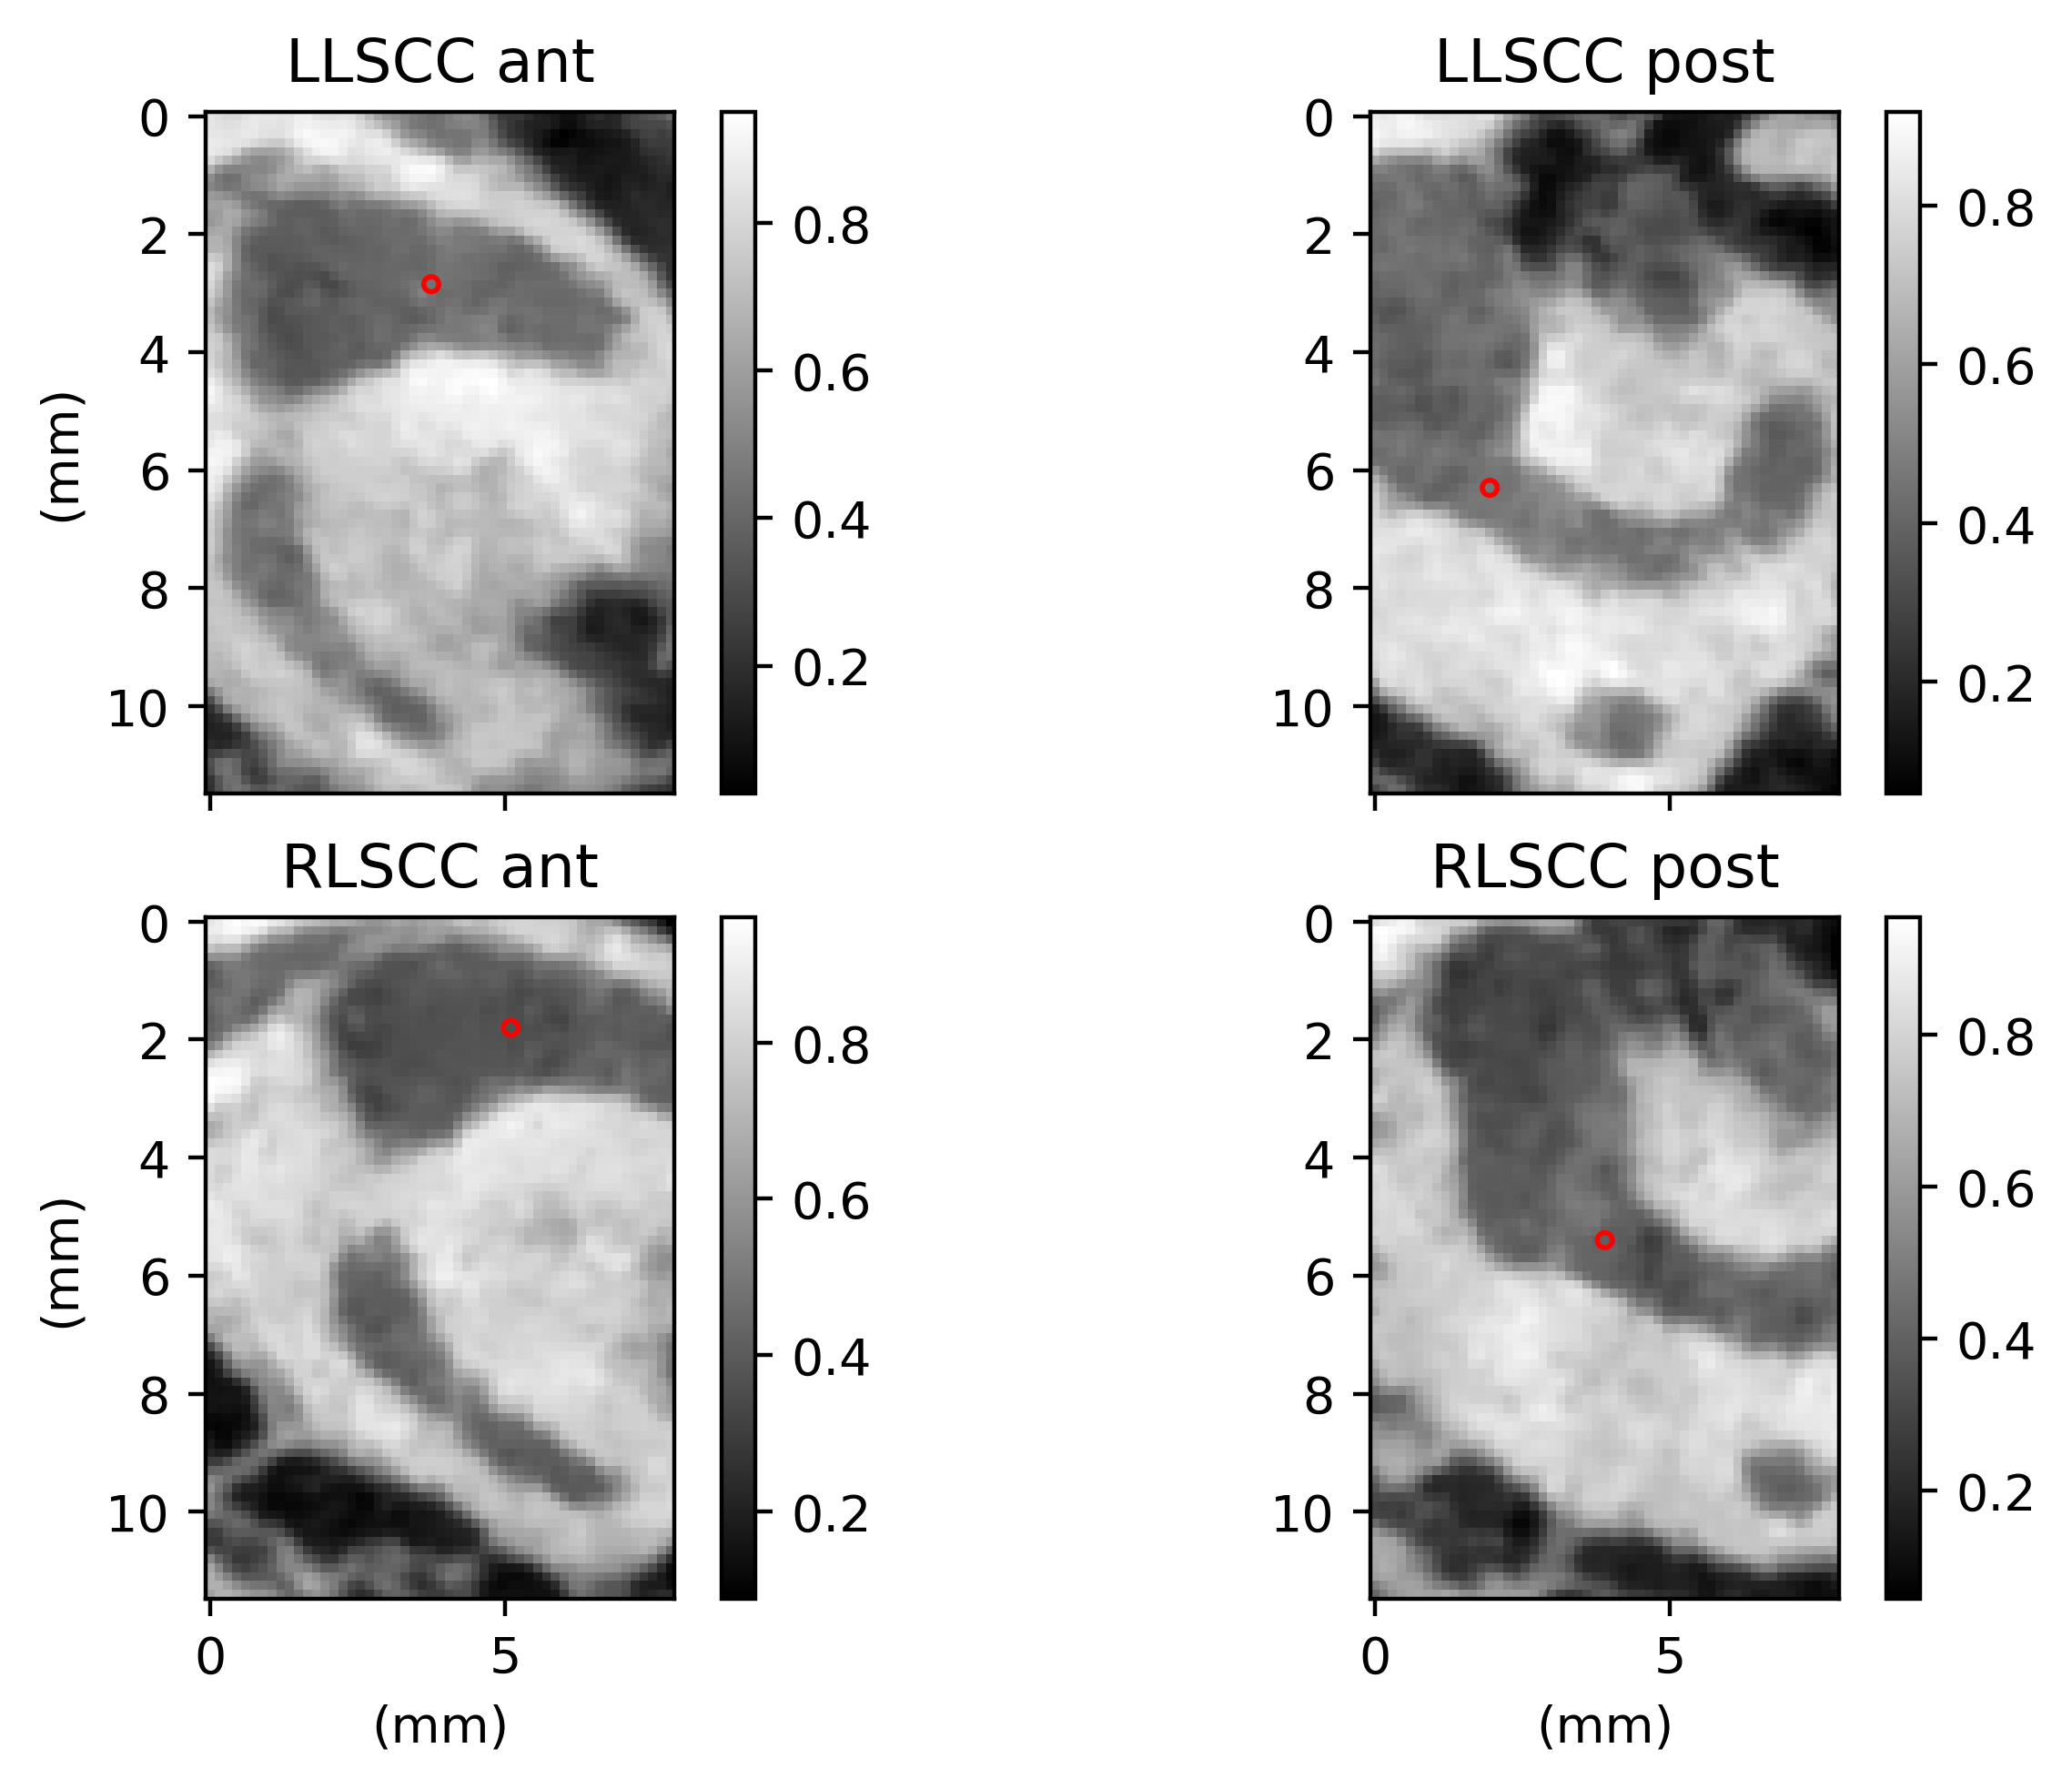

In [24]:
import common.Visualization as Visualization

pixel_space = [0.15, 0.15, 0.15]

Visualization.show_two_landmarks(left_volume_check, left_landmarks_check, right_volume_check, right_landmarks_check, pixel_space)